# Análisis de datos nulos

In [ ]:
! jupyter nbconvert --to html 2_Análisis_datos_nulos.ipynb

[NbConvertApp] Converting notebook 2_Análisis_datos_nulos.ipynb to html
[NbConvertApp] Writing 948429 bytes to 2_Análisis_datos_nulos.html


In [ ]:
import missingno as msno
import pandas as pd
pd.set_option('display.max_columns', None)

## Objetivo del notebook

En este primer análisis de la información, me gustaría tener un mejor entendimiento de los datos faltantes.

In [ ]:
def read_weather(path: str) -> pd.DataFrame:
    """Reads the csv file with the weather data from Australia,
    and the column "Date" is processed"""
    df = pd.read = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    
    return df

In [ ]:
# Leyendo el dataset
df = read_weather(r'..\data\weatherAUS.csv')

In [ ]:
df.shape

(145460, 25)

In [ ]:
def missing_data(dataframe: pd.DataFrame) -> pd.Series:
    """Returns a Series with the percent missing data  by column 
    in a dataframe"""
    return round(dataframe.isnull().sum() / len(dataframe)
                 * 100, 2)

In [ ]:
percent_missing = missing_data(df)
missing_value_df = pd.DataFrame({'total': df.shape[0], 'percent_missing': percent_missing})

En la siguiente tabla se observan las variables de interés y su porcentaje de datos nulos o faltantes.

In [ ]:
print("Porcentaje de datos faltantes por atributo")
missing_value_df.sort_values('percent_missing', ascending=False)

Porcentaje de datos faltantes por atributo


,total,percent_missing
Sunshine,145460,48.01
Evaporation,145460,43.17
Cloud3pm,145460,40.81
Cloud9am,145460,38.42
Pressure9am,145460,10.36
Pressure3pm,145460,10.33
WindDir9am,145460,7.26
WindGustDir,145460,7.10
WindGustSpeed,145460,7.06
Humidity3pm,145460,3.10


Podemos observar que variables como Sunshine, Evaportaio, Cloud3pm y Cloud9am tienen más de un 30% de datos faltantes.

Ahondaré un poco más en los datos faltante usando missigno.


<AxesSubplot:>

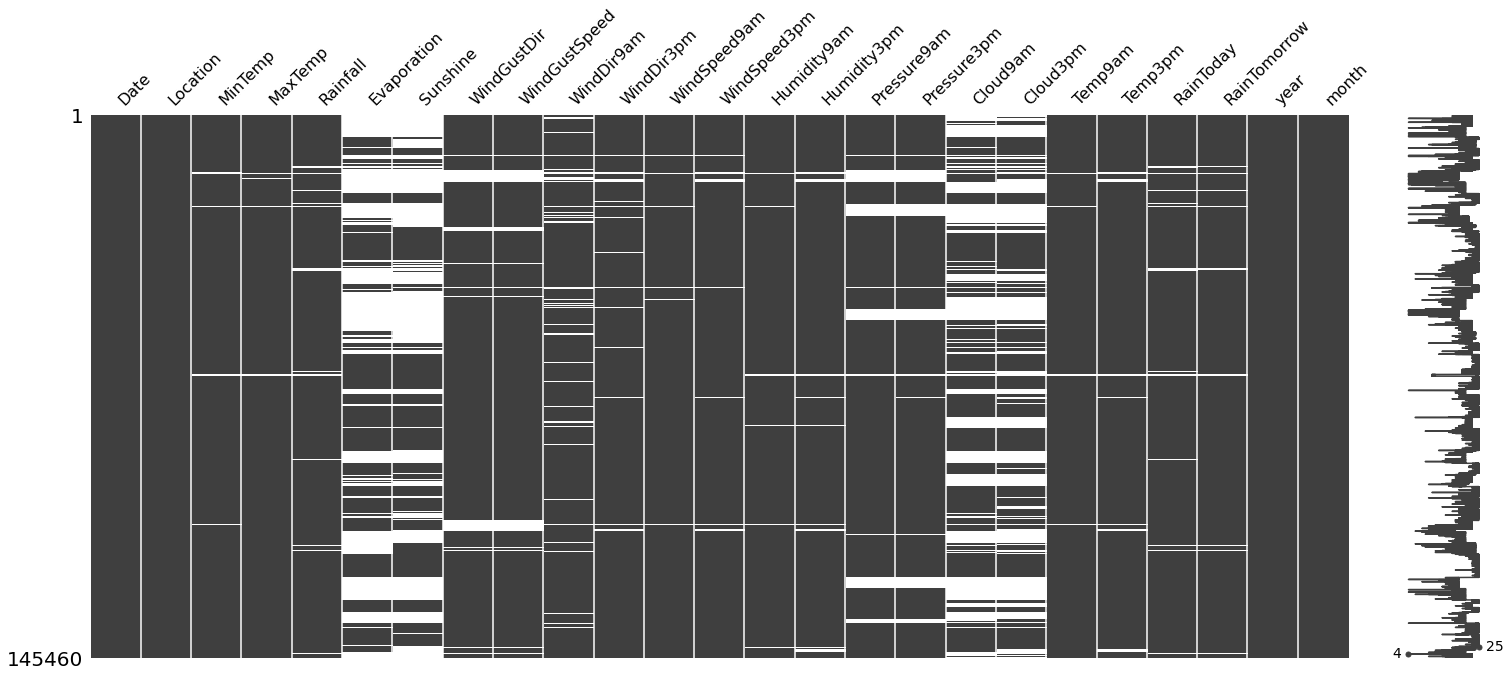

In [ ]:
msno.matrix(df)

A primera vista, podemos observar que existen periodos grandes de tiempo en los que falta información.

<AxesSubplot:>

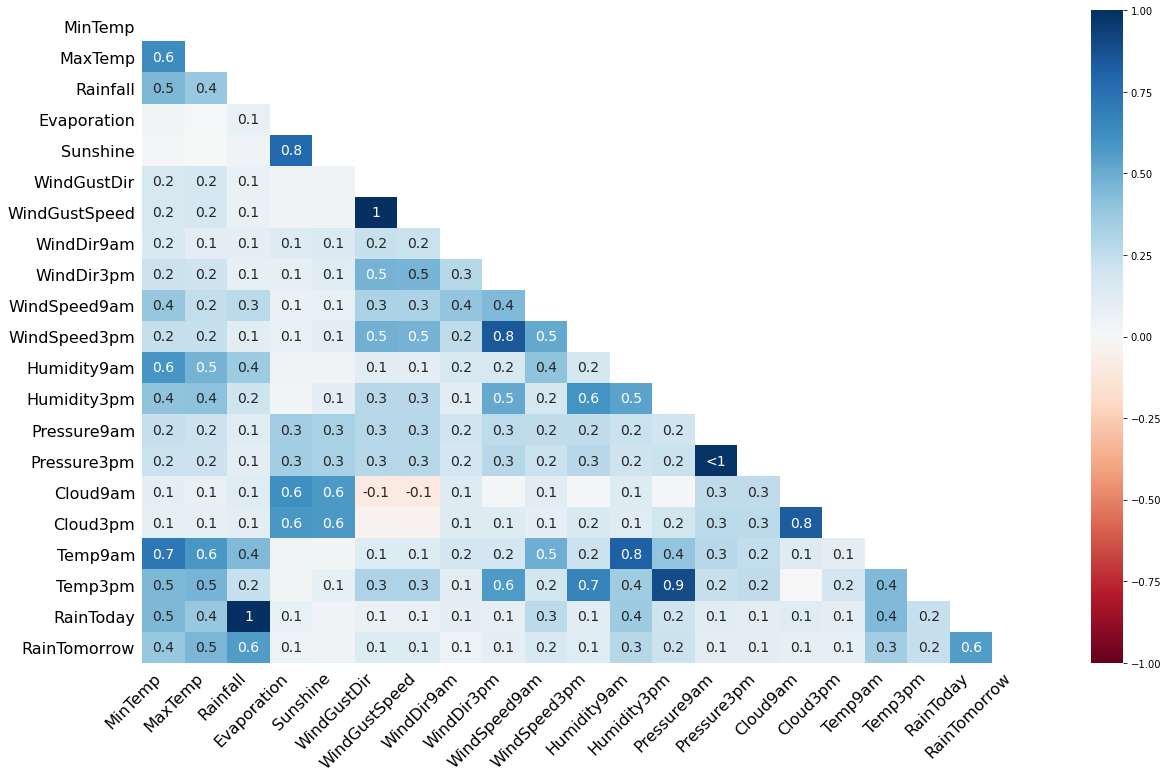

In [ ]:
msno.heatmap(df)

Ahora podemos ver relaciones interesantes en la falta de información, por ejemplo, hay una alta correlación de los atributos Sunshine vs Evaporation (0.8), Sunshine vs Cloud9am (0.6) Sunshin vs Cloud3pm (0.6). Existen otras correlaciones interesantes, pero debido a que el porcentaje de datos es baja (10%), no nos enfocaremos en ellos. 

Por último realizaré un pequeño análisis de datos faltantes con un enfoque temporal y espacial. Podría ser que con el tiempo se fueron mejorando los instrumentos de medición de datos, y los datos más completos se encuentren en el presente. Con el enfoque espacial, podría ser que en algunas ciudades los aparatos de medición no puedan tomar todas las lecturas de todos los atributos atmosféricos.

**Datos faltantes por año**

In [ ]:
df.groupby('year').count()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
year,,,,,,,,,,,,,,,,,,,,,,,,
2007,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
2008,2270,2270,2259,2262,2245,1931,1947,1817,1818,2178,2247,2240,2251,2245,2247,2175,2176,1891,1881,2251,2254,2245,2246,2270
2009,16789,16789,16582,16631,16594,11075,10643,15071,15073,15406,16221,16379,16355,16511,16486,15044,15043,11222,10987,16556,16524,16594,16595,16789
2010,16782,16782,16581,16638,16422,10857,10562,15236,15239,15271,16239,16363,16409,16487,16536,15158,15164,11250,11099,16515,16550,16422,16419,16782
2011,15407,15407,15337,15361,15125,9610,9354,14379,14381,14371,15136,15315,15291,15206,15250,13848,13865,9567,9329,15231,15271,15125,15126,15407
2012,15409,15409,15350,15362,15043,9353,8870,14532,14537,14271,15161,15322,15289,14943,14989,14030,14018,9540,9270,15230,15253,15043,15044,15409
2013,16415,16415,16345,16362,16099,9987,8845,15563,15590,15305,16180,16333,16347,16237,16226,15031,15043,9646,9597,16294,16334,16099,16097,16415
2014,17885,17885,17767,17807,17398,9658,8728,16694,16696,16410,17406,17551,17553,17738,17719,15871,15882,10736,10664,17775,17793,17398,17400,17885
2015,17885,17885,17469,17474,17232,9194,8444,16860,16881,16703,17320,17755,17471,17291,16841,15489,15493,10780,10357,17482,17032,17232,17231,17885


Podemos observar que 2007 y 2008, son años con pocos valores en comparación con los demás año, lo que pudo significar que 2007 y 2008 fueron años de implementación en la captura de la información. El caso de 2017, como solo se tiene inforación hasta el mes 6, por ello muestra la mitad de la información. Por esto podría ser buena idea descartar 2007 y 2008 del análisis.

Revisaré los atributos con mayor cantidad de datos faltantes: Sunshine, Evaportaio, Cloud3pm y Cloud9am

In [ ]:
df[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].isnull().groupby(df['year']).count()

,Sunshine,Evaporation,Cloud3pm,Cloud9am
year,,,,
2007,61,61,61,61
2008,2270,2270,2270,2270
2009,16789,16789,16789,16789
2010,16782,16782,16782,16782
2011,15407,15407,15407,15407
2012,15409,15409,15409,15409
2013,16415,16415,16415,16415
2014,17885,17885,17885,17885
2015,17885,17885,17885,17885


In [ ]:
def missing_data_by_year(dataframe: pd.DataFrame, 
                        column: str, 
                        group_by: str = 'year') -> pd.Series:
    """Return the missing data percente group by year for the
    given column"""
    return round(dataframe[column].isnull().groupby(dataframe['year']).sum()
                 / dataframe['year'].groupby(dataframe['year']).count()
                 * 100, 2)

In [ ]:
df2 = pd.DataFrame()

for col in ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']:
    df_tmp = pd.DataFrame({col: missing_data_by_year(df, col)})
    df2 = df_tmp if df2.empty else pd.concat([df2, df_tmp], axis=1)

En la siguiente tabla podemos observar que el número de datos faltantes ha estado aumentado con el tiempo. En esta parte propondría hablar con los clientes para conocer más sobre está situación.

In [ ]:
df2

,Sunshine,Evaporation,Cloud3pm,Cloud9am
year,,,,
2007,0.00,0.00,0.00,0.00
2008,14.23,14.93,17.14,16.70
2009,36.61,34.03,34.56,33.16
2010,37.06,35.31,33.86,32.96
2011,39.29,37.63,39.45,37.90
2012,42.44,39.30,39.84,38.09
2013,46.12,39.16,41.54,41.24
2014,51.20,46.00,40.37,39.97
2015,52.79,48.59,42.09,39.73


**Análisis de datos faltantes en la variable objetivo**

In [ ]:
df['RainTomorrow'].isnull().sum() 

3267

In [ ]:
round(df['RainTomorrow'].isnull().sum() / len(df) * 100, 2)

2.25

In [ ]:
col = 'RainTomorrow'
pd.DataFrame({col: missing_data_by_year(df, col)})

,RainTomorrow
year,
2007,0.00
2008,1.06
2009,1.16
2010,2.16
2011,1.82
2012,2.37
2013,1.94
2014,2.71
2015,3.66


El total de datos faltantes en la columna objetivo son 3267, lo que representa un 2.25% del total de datos, por lo que estás filas deberán ser eliminadas.

In [ ]:
df = df.dropna(subset = ['RainTomorrow'])

En el caso de los otros datos faltantes: se imputarán mediante la mediana y la moda.

**Conclusiones**

Del análisis de datos faltantes encontramos que existe una relación temporal, además de una correlación entre las variables con mayor cantidad de datos faltantes para: 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'. <br>

Por lo anterior realizaré una prueba usando estás varibles, para observar su relación con la variable objetivo y otro modelo si el uso de estás variables.

Además de que se eliminarán las filas con datos faltantes en la columna objetivo "RainTomorrow".

Una recomendación para posteriores análisis es revisar los datos faltantes distribuidos por ciudad.